<a href="https://colab.research.google.com/github/LhGhan/LhGhan/blob/main/SVM_KNN_DecisionTress__Voice_14_JAN2024ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df= pd.read_csv('voice.csv')

df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
df.describe(include='all')

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1584
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,...,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,NaN
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,...,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,NaN
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,...,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,NaN
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,...,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,NaN
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,...,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,NaN
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,...,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,NaN


In [ ]:
pd.set_option('display.max_columns', None)

df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

Target Features = Label


In [ ]:
#Identify the x axis and y axis

x = df[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']].values

type(x)

numpy.ndarray

In [ ]:
x[:5]

array([[5.97809850e-02, 6.42412677e-02, 3.20269134e-02, 1.50714886e-02,
        9.01934399e-02, 7.51219512e-02, 1.28634618e+01, 2.74402906e+02,
        8.93369417e-01, 4.91917766e-01, 0.00000000e+00, 5.97809850e-02,
        8.42791064e-02, 1.57016683e-02, 2.75862069e-01, 7.81250000e-03,
        7.81250000e-03, 7.81250000e-03, 0.00000000e+00, 0.00000000e+00],
       [6.60087404e-02, 6.73100288e-02, 4.02287348e-02, 1.94138670e-02,
        9.26661901e-02, 7.32523231e-02, 2.24232854e+01, 6.34613855e+02,
        8.92193242e-01, 5.13723843e-01, 0.00000000e+00, 6.60087404e-02,
        1.07936554e-01, 1.58259149e-02, 2.50000000e-01, 9.01442308e-03,
        7.81250000e-03, 5.46875000e-02, 4.68750000e-02, 5.26315789e-02],
       [7.73155027e-02, 8.38294209e-02, 3.67184587e-02, 8.70105656e-03,
        1.31908017e-01, 1.23206961e-01, 3.07571546e+01, 1.02492770e+03,
        8.46389092e-01, 4.78904979e-01, 0.00000000e+00, 7.73155027e-02,
        9.87062616e-02, 1.56555773e-02, 2.71186441e-01, 7.9900

In [ ]:
y = df['label']

print(y)
type(y)

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object


pandas.core.series.Series

# Data Normalization
- x -axis

In [ ]:
# StandardScaler Example 1
from sklearn import preprocessing

x = preprocessing.StandardScaler().fit(x).transform(x).astype('float')

x[:3]

array([[-4.04924806,  0.4273553 , -4.22490077, -2.57610164, -5.69360723,
        -0.21477826,  2.29330585,  1.76294635, -0.03908279,  0.4715753 ,
        -2.14121031, -4.04924806, -1.81203825, -1.0979981 ,  0.56595854,
        -1.5642046 , -0.70840431, -1.43142165, -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, -2.48688452, -5.58898726,
        -0.25848536,  4.54805598,  4.43300778, -0.06523603,  0.59443122,
        -2.14121031, -3.84105325, -1.07959443, -1.09153262, -0.29403034,
        -1.56191576, -0.70840431, -1.41810716, -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, -2.7069865 , -3.92869875,
         0.90932569,  6.51365636,  7.32620677, -1.08373029,  0.39826097,
        -2.14121031, -3.46306647, -1.36536788, -1.10039656,  0.41048032,
        -1.56386648, -0.70840431, -1.42920257, -1.41691733, -1.06534356]])

In [ ]:
# StandardScaler Example 2
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
x_scaled = scaler.fit_transform(x)

type(x_scaled)
x_scaled[:3]

array([[-4.04924806,  0.4273553 , -4.22490077, -2.57610164, -5.69360723,
        -0.21477826,  2.29330585,  1.76294635, -0.03908279,  0.4715753 ,
        -2.14121031, -4.04924806, -1.81203825, -1.0979981 ,  0.56595854,
        -1.5642046 , -0.70840431, -1.43142165, -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, -2.48688452, -5.58898726,
        -0.25848536,  4.54805598,  4.43300778, -0.06523603,  0.59443122,
        -2.14121031, -3.84105325, -1.07959443, -1.09153262, -0.29403034,
        -1.56191576, -0.70840431, -1.41810716, -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, -2.7069865 , -3.92869875,
         0.90932569,  6.51365636,  7.32620677, -1.08373029,  0.39826097,
        -2.14121031, -3.46306647, -1.36536788, -1.10039656,  0.41048032,
        -1.56386648, -0.70840431, -1.42920257, -1.41691733, -1.06534356]])

In [ ]:
# StandardScaler Example 2

#from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data ( scaler.fits means computes the mean and standard deviation of each feature in the dataset X.)
#scaler.fit(x)

# Transform the data using the fitted scaler (scaler.transform(X) standardizes the features in X using the computed mean and standard deviation.)
#x_transformed = scaler.transform(x)

# Check the type of X_transformed
#type(x_transformed)

# Display the first 10 rows of the transformed data
#x_transformed[:10]


In [ ]:
# LabelEncoder Example (LabelEncoder is used to convert categorical labels in the target variable y into numerical format)

from sklearn.preprocessing import LabelEncoder

# Assuming y is your target variable (labels)
# Create a LabelEncoder object
gender_encoder = LabelEncoder()

# Fit and transform the target variable using LabelEncoder
y_transformed= gender_encoder.fit_transform(y)

# The transformed variable 'y_transformed' now contains numeric labels
# corresponding to the original categorical labels in 'y'

type(y_transformed)
y_transformed[:3]

array([1, 1, 1])



**train_test_split**
 is a utility in scikit-learn that facilitates the process of splitting a dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have your features X and labels y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Parameters:
# X: Features
# y: Labels
# test_size: Proportion of the dataset to include in the test split (e.g., 0.2 for 20%)
# random_state: Seed for reproducibility

# Print shapes of the resulting sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(2534, 20) (634, 20) (2534,) (634,)


** **Evaluation using SVM and KNN**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your features X and labels y
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Implement SVM
svm_classifier = SVC(kernel='linear')            #1.Create an SVM classifier(You can choose different kernels like 'linear', 'rbf', sigmoid,poly ,etc. )
svm_classifier.fit(x_train, y_train)             # 2.Train the model
svm_predictions = svm_classifier.predict(x_test) #3.Make predictions on the test set

# Implement KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # 1. Initialize the KNN classifier (You can choose the number of neighbors)
knn_classifier.fit(x_train, y_train)                  # 2.Fit the classifier on the training data
knn_predictions = knn_classifier.predict(x_test)      # 3. Make predictions on the testing data

# Evaluate the models
svm_accuracy = accuracy_score(y_test, svm_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f"SVM Accuracy: {svm_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")


SVM Accuracy: 0.9763406940063092
KNN Accuracy: 0.9810725552050473


**Visualise performance of a K-Nearest Neighbors (KNN) classifier with different values of k (number of neighbors)**

[0.97318612 0.96214511 0.98107256 0.97791798 0.98107256 0.97949527
 0.98264984 0.97949527 0.97634069]


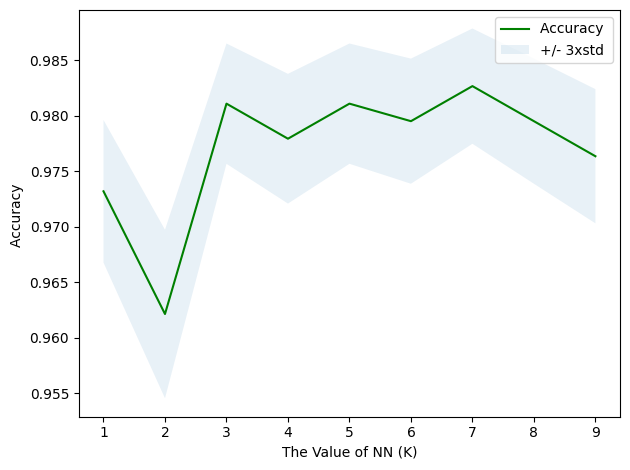

The best accuracy was with 0.9826498422712934 with k= 7


In [ ]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# specify the range of k values
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

# iterate over different k values
for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)

    # calculate mean accuracy
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    # calculate standard deviation
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

# print the mean accuracy values
print(mean_acc)

# plot the accuracy values with standard deviation
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('The Value of NN (K)')
plt.tight_layout()
plt.show()

# print the best accuracy and corresponding k value
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)


**Cross validation scores (cross_val_score) is used to perform k-fold cross-validation on the SVM classifier (svc)**

In [ ]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Initialize the SVC classifier with a linear kernel
svc = SVC(kernel='linear')

# Perform k-fold cross-validation and calculate accuracy scores (cv=10 parameter specifies 10-fold cross-validation.)
scores = cross_val_score(svc, x, y, cv=5, scoring='accuracy')

# Print the accuracy scores for each fold
print(scores)
print('')

# Print the mean accuracy of cross-validation
print('The mean accuracy of CV is', (scores.mean()) * 100)


[0.92902208 0.97791798 0.97318612 0.98262243 0.97314376]

The mean accuracy of CV is 96.71784751396632


**Best value for the regularization parameter 'C' in a Support Vector Machine (SVM) with a linear kernel using cross-validation**

[0.9696991175178692, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.9687527452781215, 0.9684372878648724]


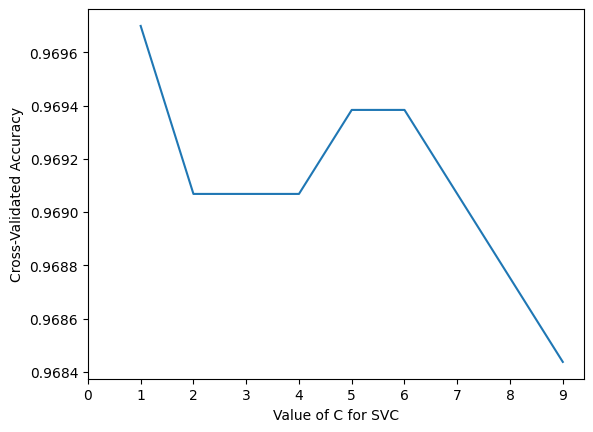

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

# Define a range of values for 'C'
C_range = list(range(1, 10))

# Initialize an empty list to store mean accuracy scores
acc_score = []

# Iterate over each 'C' value and perform 10-fold cross-validation
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, x, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())

# Print the mean accuracy scores for each 'C' value
print(acc_score)

# Plot the relationship between 'C' values and cross-validated accuracy
C_values = list(range(1, 10))
plt.plot(C_values, acc_score)
plt.xticks(np.arange(0, 10, 1))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


**classification_report function** to evaluate the performance of a classification model. It prints a report that includes precision, recall, f1-score, and support for each class, as well as the macro and micro averages.

Here's a breakdown of the key metrics in the classification report:

1.Precision: The percentage of correct positive predictions relative to the total positive predictions.

2.Recall: The percentage of correct positive predictions relative to the total actual positives.

3.F1-score: The harmonic mean of precision and recall. It balances precision and recall.

4.Support: The number of actual occurrences of the class in the specified dataset.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       297
           1       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



Decision Tree

In [ ]:
# Import necessary libraries
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a decision tree classifier
clf = tree.DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the decision tree (optional, requires graphviz)
# You can install graphviz using: pip install graphviz
# import graphviz
# dot_data = tree.export_graphviz(clf, out_file=None, feature_names=['feature1', 'feature2'], class_names=['class0', 'class1'], filled=True, rounded=True, special_characters=True)
# graph = graphviz.Source(dot_data)
# graph.render("decision_tree")


Accuracy: 0.9700315457413249


In [ ]:
df.columns[:20]

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

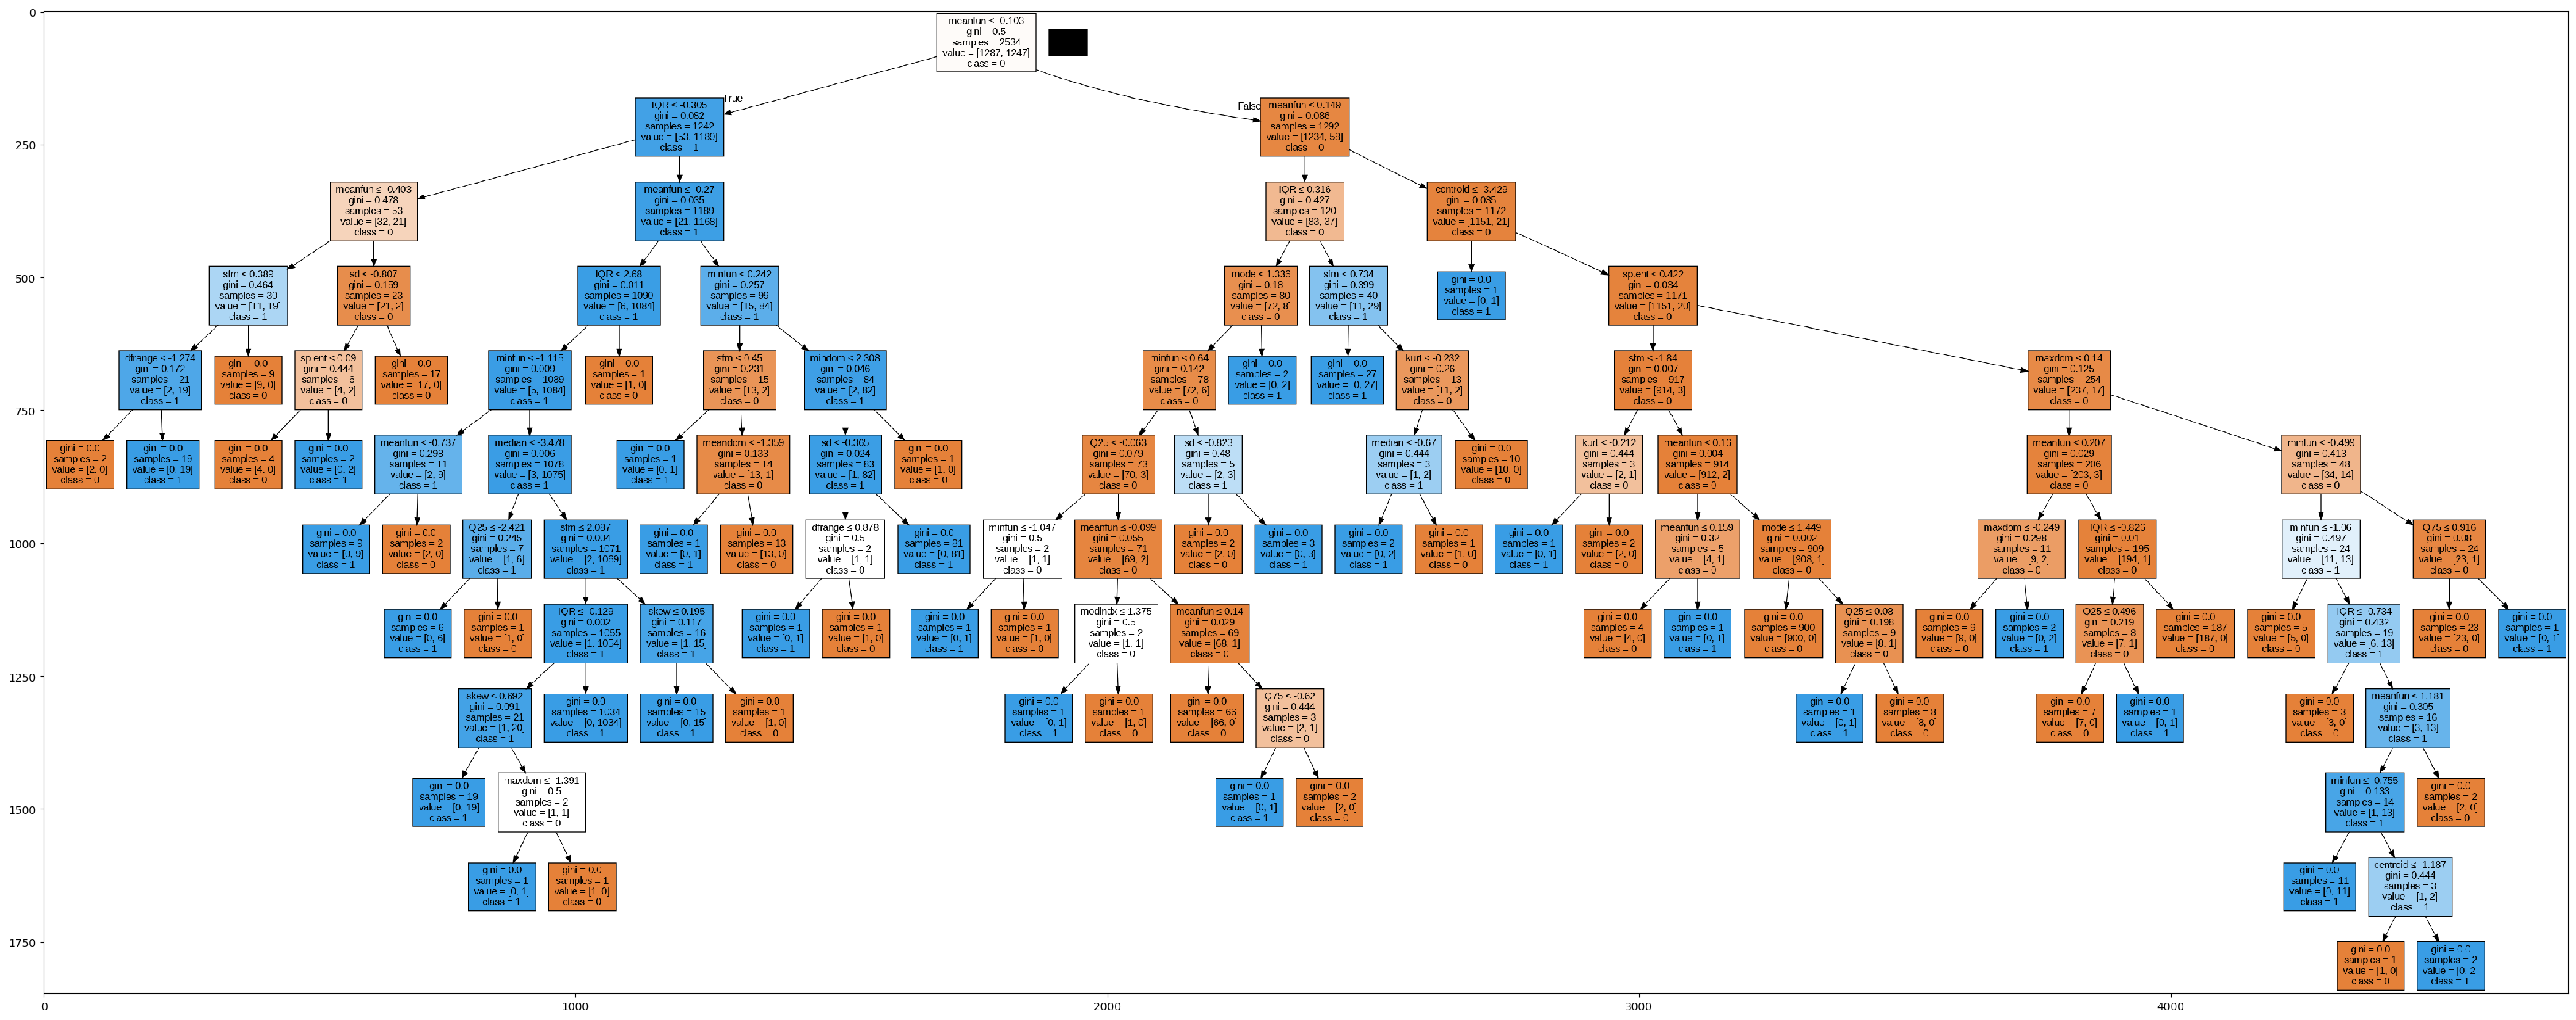

In [ ]:
import matplotlib.pyplot as plt
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import pandas as pd
import numpy as np

# Assuming you have a Decision Tree model named drugTree and a DataFrame named my_data
# Replace this with your actual model and data
# For example:
# drugTree = DecisionTreeClassifier()
# my_data = pd.DataFrame({'feature1': [1, 2, 3], 'feature2': [4, 5, 6], 'target': [0, 1, 0]})

# Fit the model to your data
# drugTree.fit(my_data[['feature1', 'feature2']], my_data['target'])

# Visualize the Decision Tree
dot_data = StringIO()
filename = "clf.png"
feature_names = df.columns[0:20]  # depend on number of columns
out = tree.export_graphviz(clf, feature_names=feature_names, out_file=dot_data, class_names=np.unique(y_train).astype('str'), filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

# Display the image using Matplotlib
img = mpimg.imread(filename)
plt.figure(figsize=(41, 51))
plt.imshow(img, interpolation='nearest')
plt.show()
